In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("/content/prime.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.shape

(8807, 12)

In [6]:
data.index

RangeIndex(start=0, stop=8807, step=1)

In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
data.director.fillna("unavailable", inplace=True)
data.cast.fillna("unavailable", inplace=True)
data.date_added.fillna("unavailable", inplace=True)
data.rating.fillna("unavailable", inplace=True)


In [11]:
print(data.rating[5541])
print(data.rating[5794])
print(data.rating[5813])

74 min
84 min
66 min


In [12]:
data.drop([5541,5794,5813],axis=0,inplace=True)

In [13]:
data["duration"]=data["duration"].fillna(data["rating"])

In [14]:
import random
country_names = ['Canada','UnitedStates','UnitedKingdom']
data['country']=data['country'].replace(np.nan,random.choice(country_names))

In [15]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **Exploratory Data Analysis**

**Highest rating**

In [16]:
rating_count = data['rating'].value_counts()
rating_count

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
unavailable       4
NC-17             3
UR                3
Name: rating, dtype: int64

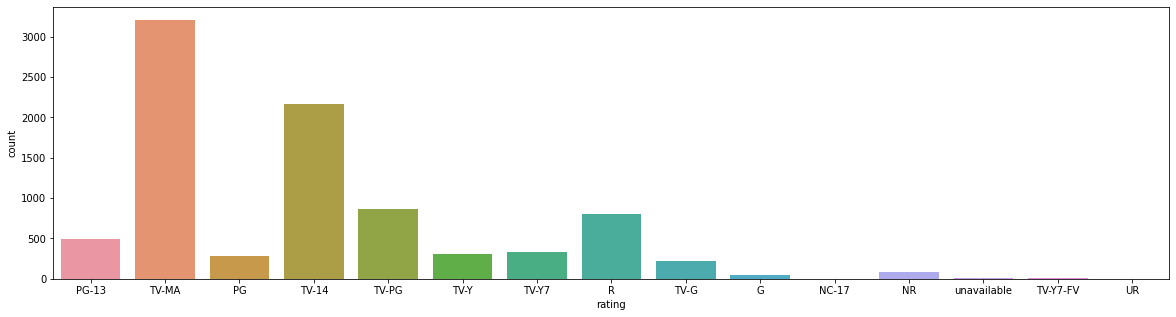

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data=data,x='rating')

**Type of shows**

In [18]:
type_counts = data['type'].value_counts()
type_counts

Movie      6128
TV Show    2676
Name: type, dtype: int64

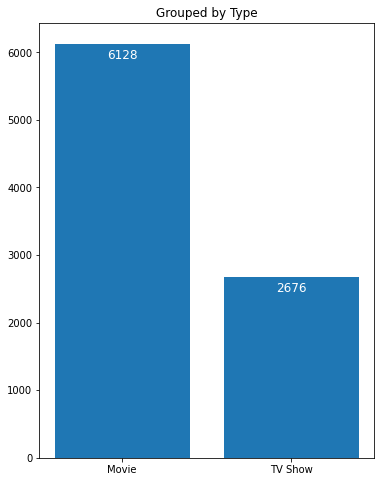

In [19]:
plt.figure(figsize=(6,8))
plt.bar(type_counts.index, type_counts.values)
plt.title('Grouped by Type')

for i, value in enumerate(type_counts.values):
    plt.text(i,value-70, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='top')
plt.show()

**Highly watched Genre**

In [20]:
genre_count = data['listed_in'].value_counts()[:10]
genre_count

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

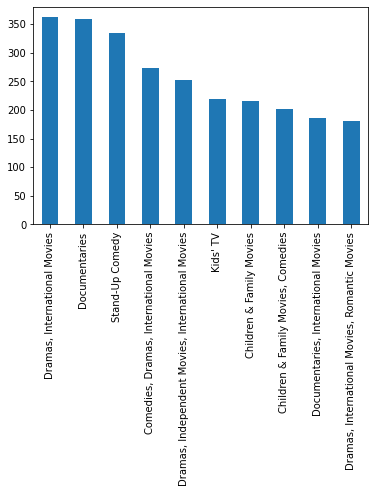

In [21]:
genre_count.sort_values(ascending=False).plot(kind='bar')

**Year of shows release**

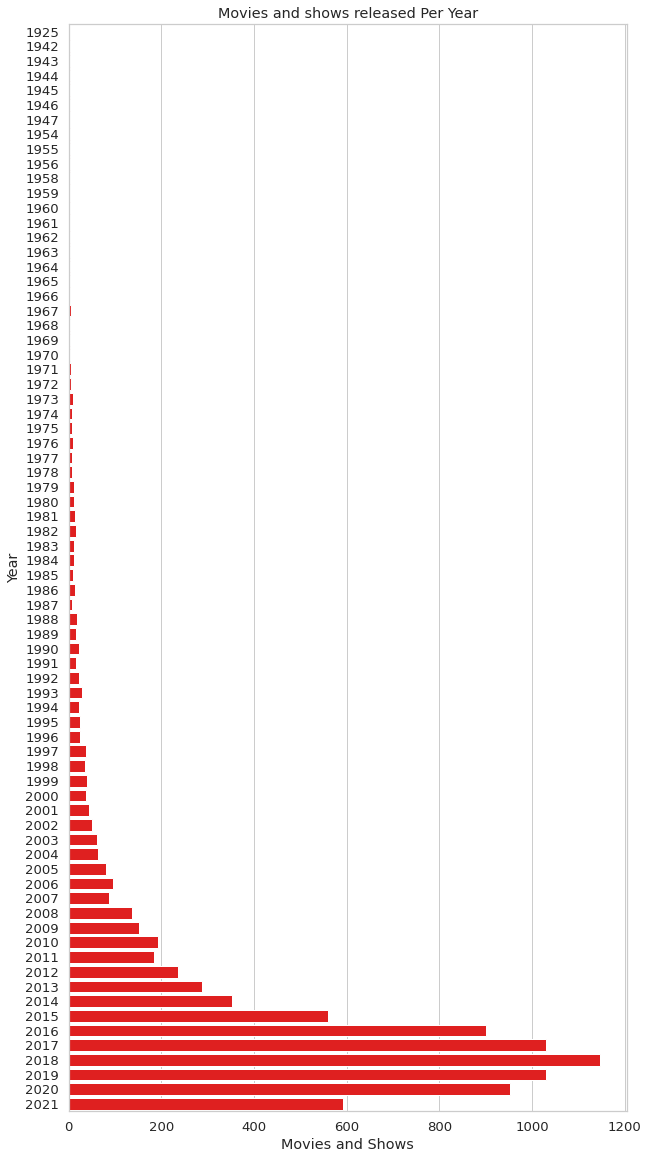

In [22]:
fig = plt.figure(figsize=(10,20))
sns.set(style='whitegrid', font_scale=1.2)
gpy = sns.countplot(y=data.release_year,data=data, color='red').set_title('Movies and shows released Per Year')
plt.xlabel('Movies and Shows')
plt.ylabel('Year')
plt.show()

**Top Countries watched prime shows**

In [23]:
country_count = data['country'].value_counts()[:5]
country_count

United States     2815
India              972
UnitedKingdom      831
United Kingdom     419
Japan              245
Name: country, dtype: int64

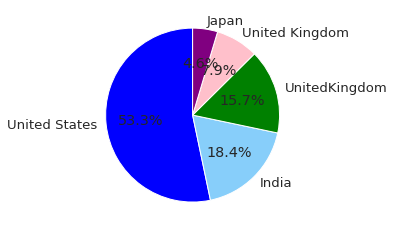

In [24]:
labels = country_count.index
colors = ['blue', 'lightskyblue', 'green', 'pink', 'purple']
plt.pie(country_count, labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()